# ISI final assignment: Life on a forum - User Demographics and behaviour

Tim Munters,
Bert Van Poeck

https://github.com/jebewa/Notebook-Life-on-a-Forum

### Libraries and packages

In [4]:
import mysql.connector
import getpass
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [5]:
pwd=getpass.getpass()
usrname='Tim' #your username 
conn = mysql.connector.connect(host="127.0.0.1", user=usrname, passwd=pwd, db="forum2")
cursor = conn.cursor(buffered=True)

········


In [6]:
cursor.execute("USE forum2");

- the age distribution of the users on the statistic forum
   
- the possible correlation between the age of users and the amount of comments they post
   
- the possible correlation between the age of users and the length of comments they post
   
- the possible correlation between the age of users and the amount of submitted posts
   
- the geographical distribution of users per age group

What kind of information can you retrieve about users on a statistics forum? What can you learn in terms of their life in and outside of the forum?

The following paper will investigate user demographics on a statistic forum. More specifically, we aim to investigate the correlations between the users' age, amount of posting, and commenting behaviour. Furtermore, we will also examine the geographical distribution of the forum's users. 
To discover more about the users' activity on the forum, we will group users by age, e.g. age group 1: 0-9, age group 2: 10-19, et cetera.

In other words, we will examine:
- the age distribution of the users on the statistic forum
- the possible correlation between the age of users and the amount of comments they post
- the possible correlation between the age of users and the length of comments they post
- the possible correlation between the age of users and the amount of submitted posts
- the geographical distribution of users per age group

During our research we encountered one major challenge: a large amount of NULL-values. Although it is possible to retrieve information about users' age or location where the value is NULL, for example, by text-mining their introduction text and posts, we only utilised data of users that had valid entries for these two variables, i.e. we excluded NULL values from our dataset.
However, we would like to note that there is a chance that even valid age and location entries are not always completely truthful. This research will demonstrate that there are ways of to establish the veracity of user and the personal information they provide online.

A first set of queries will show the amount of users per age group that actually have got a numeric value for their age field.

In [4]:
sql_query1 ="""
select age, count(*) from users where age is not NULL group by age
"""

In [5]:
df1 = pd.read_sql(sql_query1, conn)
df1.head()

,age,count(*)
0,13,1
1,14,4
2,15,7
3,16,11
4,17,11


Next, we wanted to establish our age groups. With the following query we gathered the different age groups and their size:

## Different age groups and their size

In [25]:
sql_query2 ="""
SELECT SUM(CASE WHEN Age < 9 THEN 1 ELSE 0 END) AS 'Under 9',
        SUM(CASE WHEN Age Between 10 AND 19 THEN 1 ELSE 0 END) AS '10-19',
        SUM(CASE WHEN Age BETWEEN 20 AND 29 THEN 1 ELSE 0 END) AS '20-29',
        SUM(CASE WHEN Age BETWEEN 30 AND 39 THEN 1 ELSE 0 END) AS '30-39',
        SUM(CASE WHEN Age BETWEEN 40 AND 49 THEN 1 ELSE 0 END) AS '40-49',
        SUM(CASE WHEN Age BETWEEN 50 and 59 THEN 1 ELSE 0 END) AS '50-59',
        SUM(CASE WHEN Age BETWEEN 60 and 69 THEN 1 ELSE 0 END) AS '60-69',
        SUM(CASE WHEN Age BETWEEN 70 and 79 THEN 1 ELSE 0 END) AS '70-79',
        SUM(CASE WHEN Age BETWEEN 80 and 89 THEN 1 ELSE 0 END) AS '80-89',
        SUM(CASE WHEN Age BETWEEN 90 and 99 THEN 1 ELSE 0 END) AS '90-99'
FROM users
"""

In [26]:
df1 = pd.read_sql(sql_query2, conn)
df1.head()

,Under 9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
0,0.0,114.0,3951.0,3177.0,764.0,188.0,51.0,17.0,2.0,54.0


In [27]:
df1=df1.T

In [28]:
df1.head()

,0
Under 9,0.0
10-19,114.0
20-29,3951.0
30-39,3177.0
40-49,764.0


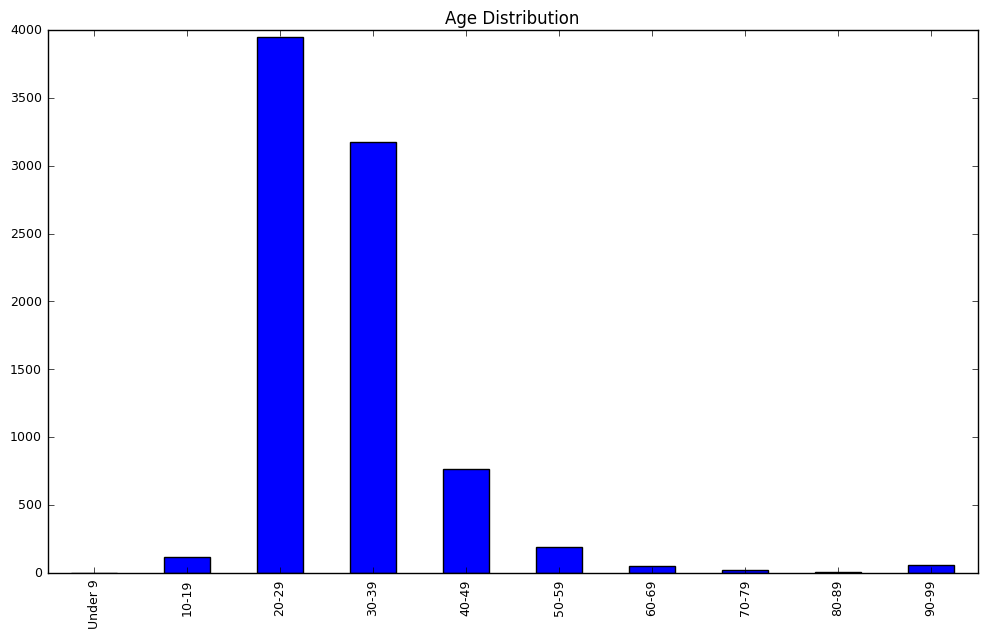

In [32]:
plt.figure()
ax1 = df1[[0]].plot(kind='bar', title ="Age Distribution", figsize=(12, 7), legend=False,
fontsize=9)
plt.show()

As the tables and plot show, the bulk of the forum consists of users whose age ranges from 20 to 39. A possible explanation is that the users in this age range often face statistical challenges due to their work or because they enrolled in an educational programme where statistics is an important part of the curriculum. 
It is also possible that users within this age range are more likely to use "digital" means of communicating, such as an online forum, for problem solving due to their familiarity with it than users from higher age ranges.

## Age and the amount of commenting

In the following subsection we will examine the data to establish whether there is a correlation between the age of users and their commenting habits:
- how often do users within a given age group comment
- how long is the average comment per age group

In [11]:
sql_queryage_comments ="""
SELECT COUNT(DISTINCT Text) AS AmountOfComments, SUM(CASE WHEN Age < 9 THEN 1 ELSE 0 END) AS 'Under 9', SUM(CASE WHEN Age Between 10 AND 19 THEN 1 ELSE 0 END) AS '10-19', SUM(CASE WHEN Age BETWEEN 20 AND 29 THEN 1 ELSE 0 END) AS '20-29', SUM(CASE WHEN Age BETWEEN 30 AND 39 THEN 1 ELSE 0 END) AS '30-39', SUM(CASE WHEN Age BETWEEN 40 AND 49 THEN 1 ELSE 0 END) AS '40-49', SUM(CASE WHEN Age BETWEEN 50 and 59 THEN 1 ELSE 0 END) AS '50-59', SUM(CASE WHEN Age BETWEEN 60 and 69 THEN 1 ELSE 0 END) AS '60-69', SUM(CASE WHEN Age BETWEEN 70 and 79 THEN 1 ELSE 0 END) AS '70-79', SUM(CASE WHEN Age BETWEEN 80 and 89 THEN 1 ELSE 0 END) AS '80-89', SUM(CASE WHEN Age BETWEEN 90 and 99 THEN 1 ELSE 0 END) AS '90-99' 
FROM users, comments 
WHERE comments.UserId = users.Id 
"""

In [12]:
df2 = pd.read_sql(sql_queryage_comments, conn)
df2.head()

,AmountOfComments,Under 9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
0,170773,0.0,22764.0,13368.0,16410.0,7097.0,5486.0,2931.0,690.0,3.0,64.0


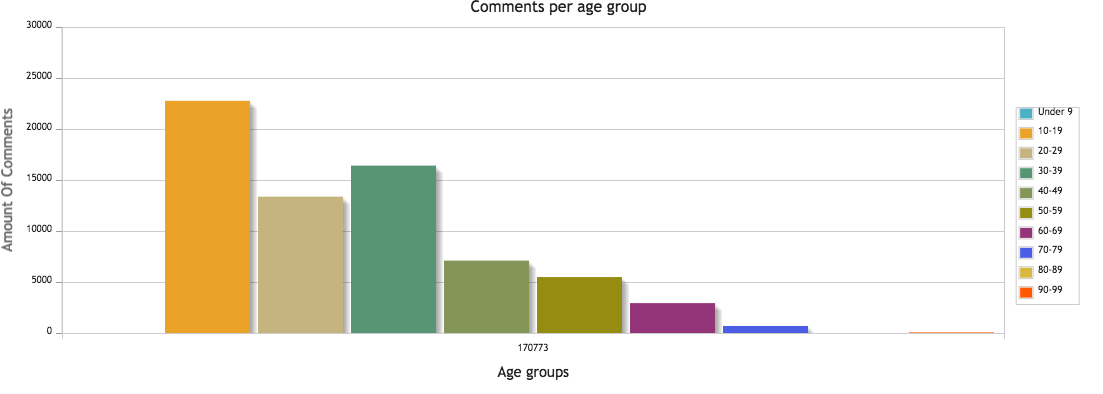

In [13]:
from IPython.display import Image
Image(filename="comment_plot.png") 

With regard to the total amount of users per age group, there seems to be a disproportionate amount of commenting from users between 10 and 19 years old. Users within age range 10 - 19 have posted a total of 22764 comments whereas user in age range 20-29 posted 13368.
The following query takes a better look at users in age range 10-19. This query will help us determine whether the majority of users in age range 10 - 19 are simply incredibly active on the forum or whether there is something entirely else going on.

In [14]:
sql_queryage_specific = """SELECT UserId, Displayname, COUNT(DISTINCT Text) AS AmountOfComments, Age 
FROM comments, users 
WHERE comments.UserId = users.Id AND Age BETWEEN 10 and 19
GROUP BY Age
ORDER BY AmountOfComments
"""

In [15]:
df90 = pd.read_sql(sql_queryage_specific, conn)
df90=df90.T
df90.head()

,0,1,2,3,4,5,6
UserId,44114,25363,14062,297,7828,805,919
Displayname,Anubian Noob,Emrakul,Claudio Albertin,Maxim Zaslavsky,Anony-Mousse,Glen_b,whuber
AmountOfComments,1,30,32,46,591,8786,13237
Age,15,18,19,17,16,13,14


It appears that the remarkable high amount of comments by users in the age category 10-19 is a result of two specific users: Glen_b and Whuber. Both commenters portray an unusual high commenting activity with whuber even being the overall top commenter on the forum. After examining the comments from both users, we established that these users are indeed posting legitimate comments on posts and that they are not spam bots. However, this poses a new question. Given the fact that both users provide an enormous amount of helpful, legitimate comments, are Glen_b and whuber indeed respectively 13 and 14 years old? In order to establish the veracity of their age, we examined these two accounts more closely. Whuber provides a link to his personal website in his introduction text. A quick glance at his website confirms our suspicion that whuber is not a 14 year old but instead he is a middle-aged statistics consultant.

A next part will investigate this phenomenon where a small group of users posts an incredible amount of comments. With a scatterplot we will try to combine the amount of comments with the amount of commenters per age.

In [16]:
sql_for_commenters ="""
SELECT COUNT(DISTINCT Text) AS AmountOfComments, Age, COUNT(DISTINCT users.Id) AS AmountOfUsers
FROM users, comments 
WHERE comments.UserId = users.Id
GROUP BY Age
"""

In [17]:
df50 = pd.read_sql(sql_for_commenters, conn)
df50.head()

,AmountOfComments,Age,AmountOfUsers
0,102292,NaN,11236
1,8786,13.0,1
2,13237,14.0,2
3,1,15.0,1
4,591,16.0,5


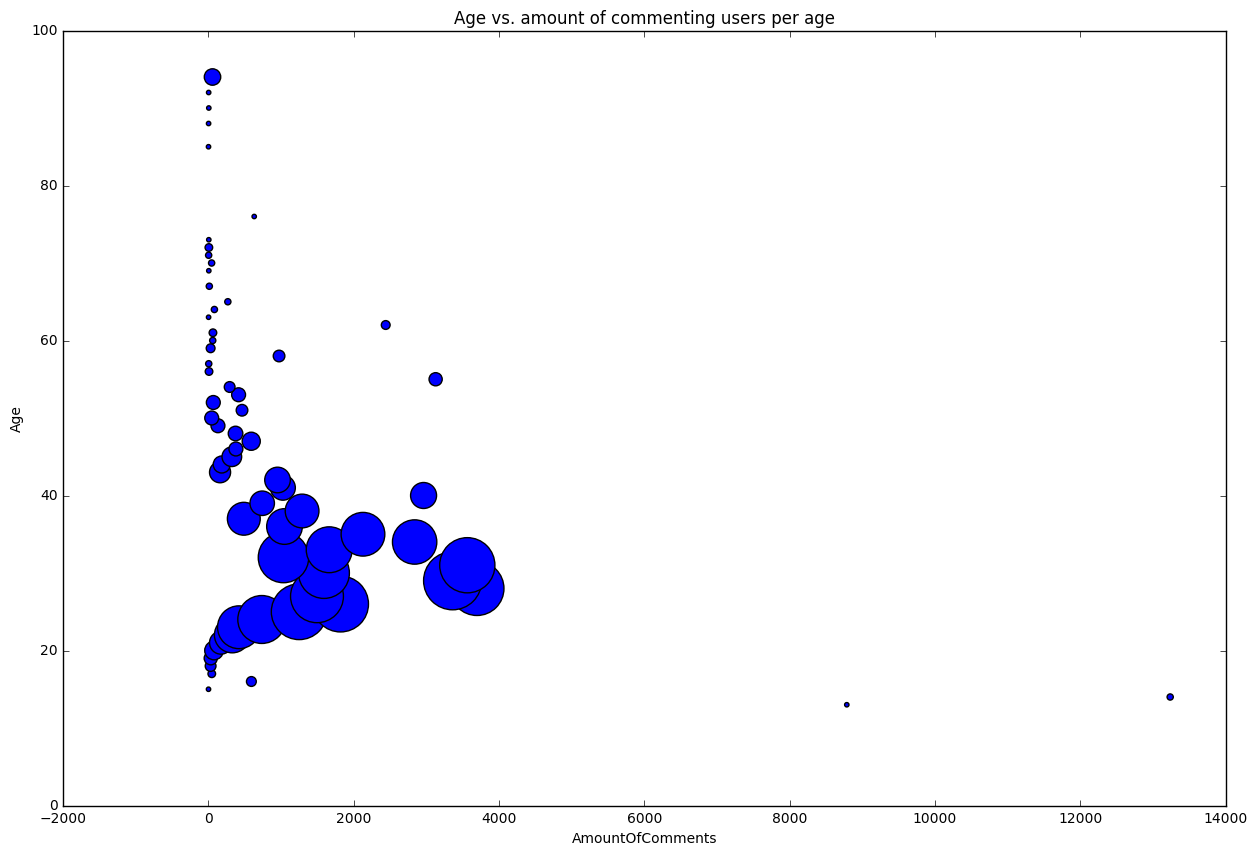

In [18]:
df50.plot.scatter(x='AmountOfComments', y='Age', s=df50['AmountOfUsers'] * 10, figsize=(15,10), title='Age vs. amount of commenting users per age')
plt.show()

The scatterplot gives a clear image of how people below the age of 40 tend to be more active in commenting. A reasonable explanation is that the majority of active users on the forum fall within the age range of 10 and 40.
Ignoring the outliers for a moment, the most amount of comments seem are provided by user around the age of 30. 

Interestingly, the high amount of comments is mostly a group effort. This is especially true for the users between the age of 20 and 40 which is not that surprising since it is the dominant age group on the forum. For most age groups, the amount of commenting is done by a large group of users rather than a few.

However, there are some exceptions to this observation: some individual users seem to comment above average rate of comments. For example, the aformentioned users, Glen_B and whuber. They are situated to the utmost right of the scatterplot, meaning they posted an incredible amount of comments. There are a few other user that also comment more than the average user, yet their commenting behaviour is not that remarkable compared to whuber and Glen_b, who can be considered exceptions. 

It would be unwise to assume that all these comments would have the same length. Perhaps top commenters only post short comments and are therefore able to post the amount of comments they submit. Another scatterplot will look at the average length of these comments per age group.

In [19]:
sql_for_length ="""
SELECT COUNT(DISTINCT Text) AS AmountOfComments, Age, AVG(LENGTH(Text)) AS Length
FROM users, comments 
WHERE comments.UserId = users.Id
GROUP BY Age
"""

In [20]:
df55 = pd.read_sql(sql_for_length, conn)
df55.head()

,AmountOfComments,Age,Length
0,102292,NaN,227.2587
1,8786,13.0,239.0041
2,13237,14.0,305.7374
3,1,15.0,39.0000
4,591,16.0,230.9848


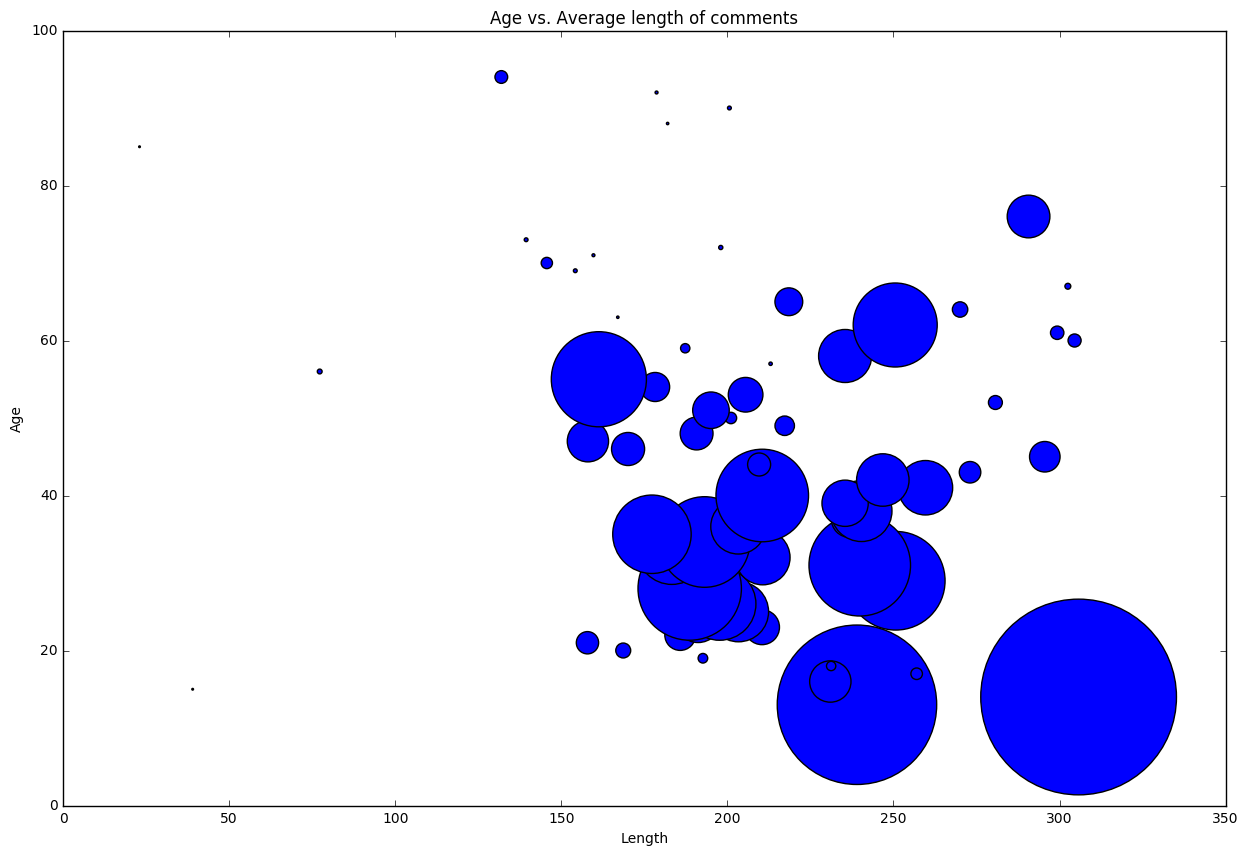

In [21]:
df55.plot.scatter(x='Length', y='Age', s=df55['AmountOfComments'] * 1.5, figsize=(15,10), title='Age vs. Average length of comments')
plt.show()

Based on the information we retrieved, the average comment length situates itself between 150 and 300 words per post. This size is somewhat consistent across the age ranges, meaning that there are not specific age groups that post shorter or longer comments.
This data contradicts our earlier hypothesis that both top commentors, Glen_B and whuber, only post very short comments in order to boost their number of comments.

## Age and amount of posts

In the following subsection we will examine the data to establish whether there is a correlation between the age of users and their posting habits:
- how often do users within a given age group submit posts

In [22]:
sql_query_post ="""SELECT COUNT(DISTINCT Body) AS AmountOfPosts, SUM(CASE WHEN Age < 9 THEN 1 ELSE 0 END) AS 'Under 9', SUM(CASE WHEN Age Between 10 AND 19 THEN 1 ELSE 0 END) AS '10-19', SUM(CASE WHEN Age BETWEEN 20 AND 29 THEN 1 ELSE 0 END) AS '20-29', SUM(CASE WHEN Age BETWEEN 30 AND 39 THEN 1 ELSE 0 END) AS '30-39', SUM(CASE WHEN Age BETWEEN 40 AND 49 THEN 1 ELSE 0 END) AS '40-49', SUM(CASE WHEN Age BETWEEN 50 and 59 THEN 1 ELSE 0 END) AS '50-59', SUM(CASE WHEN Age BETWEEN 60 and 69 THEN 1 ELSE 0 END) AS '60-69', SUM(CASE WHEN Age BETWEEN 70 and 79 THEN 1 ELSE 0 END) AS '70-79', SUM(CASE WHEN Age BETWEEN 80 and 89 THEN 1 ELSE 0 END) AS '80-89', SUM(CASE WHEN Age BETWEEN 90 and 99 THEN 1 ELSE 0 END) AS '90-99' 
FROM users, posts 
WHERE posts.OwnerUserId = users.Id"""

In [23]:
df3 = pd.read_sql(sql_query_post, conn)
df3.head()

,AmountOfPosts,Under 9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
0,90350,0.0,3402.0,6901.0,8825.0,3717.0,2637.0,826.0,456.0,0.0,40.0


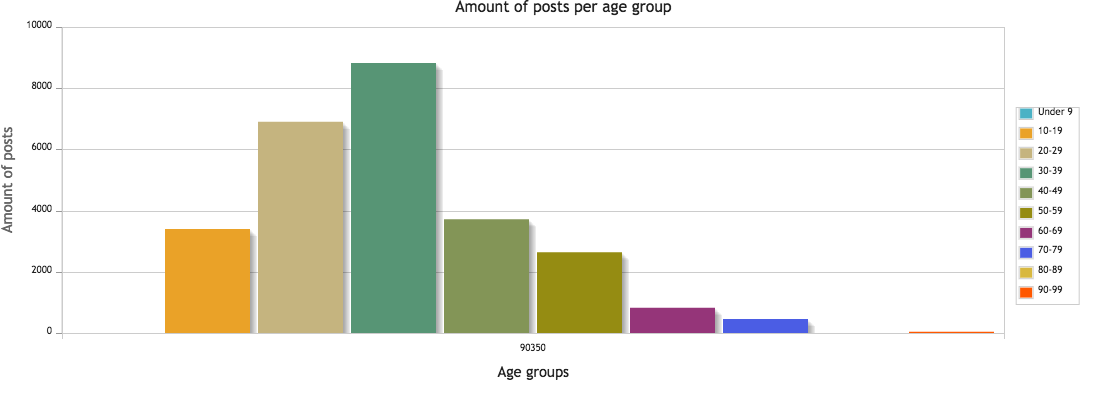

In [24]:
from IPython.display import Image
Image(filename="post_plot.png")

As the plot shows, users within the age range of 30-39 provide the most posts, followed by users in age range 20-29. A possible explanation here is that these are users who are often confronted with statistical challenges in their daily life and want some feedback or insights from others in order to solve their problems.

## Users and their geographical location

In the following subsection we will examine the geographical distribution of the users on the forum.

The first query  concerning location is an explorative one: how many different locations are we dealing with and how many locations have a NULL value?

In [25]:
sql_query3 ="""
SELECT count(*), Location FROM users GROUP BY Location
"""

In [26]:
df4 = pd.read_sql(sql_query3, conn)

We counted all the different locations and their occurence in our database from the table 'users'.
There are in total 2402 rows (insert total amount of users to compare how many users have filled in their location). 2402 rows translates to 2401 unique location entries. 
28634 users have a NULL value for their location. 
As mentioned previously, we will not include the users with NULL values in our study.
Interestingly, the location entry does allow for 'invalid' locations to be submitted. For example, several users have ' ' '!', ' ;) ' or '-' as location. Others use co-ordinates for their location, making it difficult to group these users. One solution would be to include these users in a new group 'Nonsensical Locations' as to mark the fact that they do have a location, but not a real one. However, as to not make this research question too intricate and perhaps convoluted, we decided to only utilise the location entries of users which contain a valid location.


The second query filters out all the location entries with a NULL value.

In [27]:
sql_query4 ="""
SELECT count(*), Location FROM users WHERE Location is NOT NULL GROUP BY Location ORDER BY count(*) DESC 
"""

In [28]:
df5 = pd.read_sql(sql_query4, conn)
df5.head()

,count(*),Location
0,352,United States
1,281,"London, United Kingdom"
2,222,Germany
3,209,India
4,209,United Kingdom


We also included an extra statement that orders the 'count()' table in descending order to get a sense of where most users live. This also helps avoid encountering a lot of nonsensical locations such as ' ;) ' as only a minority of users use nonsensical locations.

Here, we encounter a new challenge. According to the query we have 352 users living in the United States of America. However, we also have 154 users living in San Franciso, CA, which is also in the United States. This example demonstrates that we are working with data that is not perfect as we will have to manipulate the data to make it more 'readable'.

To solve this issue, we need to make a query where all users that have a location that is equal to "United States" AND the string includes a two-letter combination (state initials). Unfortunately that won't make our query perfect, as some users only inserted their hometown or state without initials.

It would be faster and more efficient to explore all rows individually, note all US locations down and then add up all numbers than make a query which includes all possible American states (full form and initials) if you do not know all American cities, states and initials by heart. Another problem with the geographical information is the use of different names for the same place. People that live in England can use 'England' to indicate their location, or 'United Kingdom' or even 'Great Britain'. Next to that, some users also tend to only mention their hometown as the location without including of the country.

It could then be more interesting to do a query to find out more about a specific part of our user database. For example, how many users hail from Belgium, and where are they from, specifically?

In [29]:
sql_query5 ="""
SELECT COUNT(*), Location FROM `users` WHERE Location LIKE "%Belgium%" GROUP BY Location
"""

In [30]:
df_belgium = pd.read_sql(sql_query5, conn)
df_belgium.head()

,COUNT(*),Location
0,8,"Antwerp, Belgium"
1,1,"Antwerp/Leuven, Belgium"
2,71,Belgium
3,2,"Bruges, Belgium"
4,13,"Brussels, Belgium"


As this query shows we get a number of users who live in Belgium. However, users that live in a Belgian city, like Antwerp / Antwerpen, or Brussel / Brussels / Bruxelles are not included.

### Export of geographical location and textmining


Because of the aforementioned problems with the data for the locations, we decided to use methods other than SQL for retrieving relevant information from our database. Since the location fields without NULL values consist of strings as a data type, the most obvious technique is text mining. In order to do this, the relevant data needs to be exported first.

In [31]:
sql_query6 ="""
SELECT Location FROM users
WHERE Location IS NOT NULL
INTO OUTFILE 'C:\location.csv'"""

The resulting csv-file was put into a text analysis tool, Voyant. Voyant can visualise the frequency of significant words. The word *United* is the word that occurs most in our location database since it can belong both to *Kingdom* and *States*. Therefore, we excluded it from the frequency list.

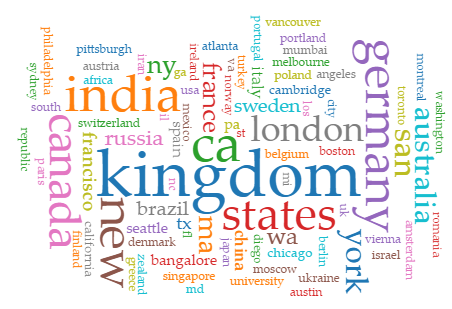

In [32]:
from IPython.display import Image
Image(filename="frequent_locations.png")

The word cloud already tells a little bit more about the geographic location of the users. For example, most users have submitted as their location the word *kingdom*. However, *Germany*, *(United) States*, *Canada*, and *India* have also frequently used as location input.

Our word cloud excludes fields nonsensical locations, such as interpunction, smileys and coordinates. Unfortunately, it also filters out misspelled locations, therefore the word cloud can only give us a rough estimate where most of our user reside. In other words, the word cloud cannot provide us with a concise and precise overview of the geographical distribution of the users. 
For example, *ca* stands for California and is the third most frequent location in our dataset. It has a higher frequency than *states* while California actually is a state within the United States. 
Other keywords like *University* do not really give information that is related to a country, yet it is still meaningful since it might mean that users like to emphasize their authority by claiming to be related to an academic institution.

Furthermore, this word cloud shows a high frequency of Western countries. However, India also has a high frequency. This might suggest that there is an important language component involved concerning our users and their involvement on the forum. Since most text on the forum is in English, it can be no surprise that the most common locations are those where English is an official language and/or where a significant amount of the population has some proficiency in English.

In order to gain more insight into the geographical distribution of the forum's user, we combined the text mining methods with the data retrieved from our age queries.

As you can see below, the images illustrate the geographical distribution of users per age group.When different word clouds are juxtaposed,they highlight the high rate of representation of Western countries.
Interestingly, most users seem to provide their country when asked for their location instead of their hometown or province for example. This appears to be true for nearly all countries except for the United States of America where input like *ca* (California) or *ny* (New York) is sometimes more frequently used than (United) *States*.

Note: because many users above the age of 69 often fail to include information about their location, we chose to exclude these age ranges in the comparisons.



In [1]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><p><b>10-19</p><img src='10-19.png'></td><td><p><b>20-29</p><img src='20-29.png'></td><td><p><b>30-39</p><img src='30-39.png'></td></tr></table>"))
display(HTML("<table><tr><td><p><b>40-49</p><img src='40-49.png'></td><td><p><b>50-59</p><img src='50-59.png'></td><td><p><b>60-69</p><img src='60-69.png'></td></tr></table>"))

10-19,20-29,30-39


40-49,50-59,60-69


Another way of comparing the location input by users of different age groups is to visualize this data in a graph. The process below gives an example of how this is possible. Since most countries are located in the West, we will take the most-represented country of the East: India. 
Curiously, for Indian **user**, there is an large quantitative difference in the amount of users per age group. A large amount of Indian users situate themselves in lower age ranges (10-29).
Therefore, we wanted to calculate the relative percentage of Indian users on our forum.

The first query below gives an idea of the discrepancy in the amount of user between all age groups. 

### Relative importance of users from India

In [7]:
sql_query7 = """SELECT Location, SUM(CASE WHEN Age < 9 THEN 1 ELSE 0 END) AS 'Under 9',
        SUM(CASE WHEN Age Between 10 AND 19 THEN 1 ELSE 0 END) AS '10-19',
        SUM(CASE WHEN Age BETWEEN 20 AND 29 THEN 1 ELSE 0 END) AS '20-29',
        SUM(CASE WHEN Age BETWEEN 30 AND 39 THEN 1 ELSE 0 END) AS '30-39',
        SUM(CASE WHEN Age BETWEEN 40 AND 49 THEN 1 ELSE 0 END) AS '40-49',
        SUM(CASE WHEN Age BETWEEN 50 and 59 THEN 1 ELSE 0 END) AS '50-59',
        SUM(CASE WHEN Age BETWEEN 60 and 69 THEN 1 ELSE 0 END) AS '60-69',
        SUM(CASE WHEN Age BETWEEN 70 and 79 THEN 1 ELSE 0 END) AS '70-79',
        SUM(CASE WHEN Age BETWEEN 80 and 89 THEN 1 ELSE 0 END) AS '80-89',
        SUM(CASE WHEN Age BETWEEN 90 and 99 THEN 1 ELSE 0 END) AS '90-99'
FROM `users`
WHERE Location is not NULL
"""

In [8]:
df55 = pd.read_sql(sql_query7, conn)
df55.head()

,Location,Under 9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
0,on the server farm,0.0,90.0,3369.0,2858.0,715.0,172.0,49.0,14.0,1.0,54.0


Different from the results of the Notebook we submitted because the 'Location is not NULL'-part got lost in that version.

We then use these numbers to define the absolute percentage of users per age group that defined India as their location.

The following query calculates the absolute importance of India within 'location'.

In [20]:
sql_query8 = """SELECT 
        SUM(CASE WHEN Age < 9 THEN 1 ELSE 0 END) AS 'Under 9',
        (SUM(CASE WHEN Age Between 10 AND 19 THEN 1 ELSE 0 END) / 90.0 * 100) AS '10-19',
        (SUM(CASE WHEN Age BETWEEN 20 AND 29 THEN 1 ELSE 0 END) / 3369.0 * 100) AS '20-29',
        (SUM(CASE WHEN Age BETWEEN 30 AND 39 THEN 1 ELSE 0 END) / 2858.0 * 100) AS '30-39',
        (SUM(CASE WHEN Age BETWEEN 40 AND 49 THEN 1 ELSE 0 END) / 715.0 * 100) AS '40-49',
        (SUM(CASE WHEN Age BETWEEN 50 and 59 THEN 1 ELSE 0 END) / 172.0 * 100) AS '50-59',
        (SUM(CASE WHEN Age BETWEEN 60 and 69 THEN 1 ELSE 0 END) / 49.0 * 100) AS '60-69',
        (SUM(CASE WHEN Age BETWEEN 70 and 79 THEN 1 ELSE 0 END)  / 14.0 * 100) AS '70-79',
        (SUM(CASE WHEN Age BETWEEN 80 and 89 THEN 1 ELSE 0 END) / 1.0 * 100) AS '80-89',
        (SUM(CASE WHEN Age BETWEEN 90 and 99 THEN 1 ELSE 0 END) / 54.0 * 100) AS '90-99'
FROM `users`


WHERE Location LIKE "%india%"
"""

In [21]:
df66 = pd.read_sql(sql_query8, conn)
df66.head()

,Under 9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
0,0.0,13.3333,11.5465,3.254,1.1189,0.5814,0.0,7.1429,0.0,0.0


In [22]:
df66=df66.T
df66.head()

,0
Under 9,0.0000
10-19,13.3333
20-29,11.5465
30-39,3.2540
40-49,1.1189


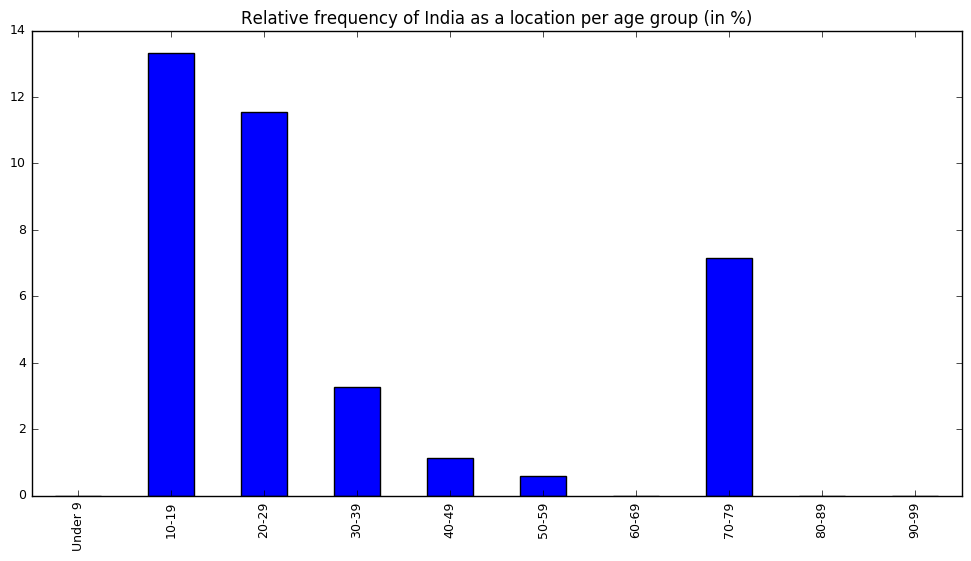

In [23]:
plt.figure()
ax1 = df66[[0]].plot(kind='bar', title ="Relative frequency of India as a location per age group (in %)", figsize=(12, 6), legend=False,
fontsize=9)
plt.show()

In [13]:
sql_query99 = """SELECT 
        SUM(CASE WHEN Age < 9 THEN 1 ELSE 0 END) AS 'Under 9',
        (SUM(CASE WHEN Age Between 10 AND 19 THEN 1 ELSE 0 END) / 90.0 * 100) AS '10-19',
        (SUM(CASE WHEN Age BETWEEN 20 AND 29 THEN 1 ELSE 0 END) / 3369.0 * 100) AS '20-29',
        (SUM(CASE WHEN Age BETWEEN 30 AND 39 THEN 1 ELSE 0 END) / 2858.0 * 100) AS '30-39',
        (SUM(CASE WHEN Age BETWEEN 40 AND 49 THEN 1 ELSE 0 END) / 715.0 * 100) AS '40-49',
        (SUM(CASE WHEN Age BETWEEN 50 and 59 THEN 1 ELSE 0 END) / 172.0 * 100) AS '50-59',
        (SUM(CASE WHEN Age BETWEEN 60 and 69 THEN 1 ELSE 0 END) / 49.0 * 100) AS '60-69',
        (SUM(CASE WHEN Age BETWEEN 70 and 79 THEN 1 ELSE 0 END)  / 14.0 * 100) AS '70-79',
        (SUM(CASE WHEN Age BETWEEN 80 and 89 THEN 1 ELSE 0 END) / 1.0 * 100) AS '80-89',
        (SUM(CASE WHEN Age BETWEEN 90 and 99 THEN 1 ELSE 0 END) / 54.0 * 100) AS '90-99'
FROM `users`


WHERE Location LIKE "%kingdom%"

"""

In [14]:
df99 = pd.read_sql(sql_query99, conn)
df99 = df99.T

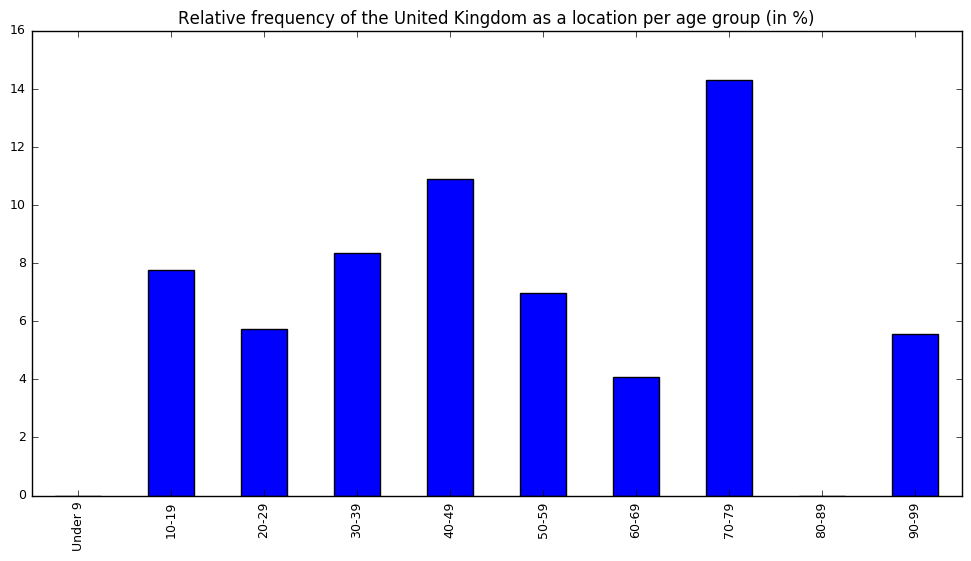

In [15]:
plt.figure()
ax1 = df99[[0]].plot(kind='bar', title ="Relative frequency of the United Kingdom as a location per age group (in %)", figsize=(12, 6), legend=False,
fontsize=9)
plt.show()

The relative importance of users from the United Kingdom contributes more "consistently" compared to the forums total amount of users compared to the users from India.

The bar chart above gives an overview of how one geographical location can be represented over the different age groups. Unfortunately, the word clouds cannot provide us with an objective comparison where most users within each age range live. 

To solve this challenge, we will utilise the Jaccard index and try to establish the similarities of location inputs for age ranges. Each operation compares two age ranges against one another (10-19 against 20-29, 20-29 against 30-39). We have chosen not to include the age ranges above 50-59 due to the low amount of users and location entries in those age ranges.

To this objective, we exported Json-files from Voyant for the comparisons. 
Please note that in the tables below the amount of times a specific location occurs within a specific age group can be different from the calculations made with previous queries above. 

This is because we used SQL for the calculations in the table above, while the table below is based on calculations by the Voyant tool. Since terms like 'india' do not always appear an sich but with other strings like 'New Dehli, india' or even '%%''india!!%µ' as well. Due to this difference, we assume SQL and Voyant use different string recognition methods.

### Comparison of the location similarity for the different age groups

- Export of Json-files from voyant

- Calculation of Jaccard Similarity Coefficient

- Filtering of nonsense-inputs

In [43]:
df6 = pd.read_json('location_10to19.json', conn)
df6.head()

,#,Count,Relative,Term,Trend
0,0,12,61855.670,india,"[0, 0.005154639, 0.0154639175, 0.010309278, 0...."
1,0,7,36082.473,kingdom,"[0.005154639, 0.010309278, 0.005154639, 0, 0, ..."
2,0,7,36082.473,new,"[0.005154639, 0, 0.005154639, 0.005154639, 0.0..."
3,0,5,25773.195,germany,"[0, 0.005154639, 0, 0.010309278, 0.005154639, ..."
4,0,5,25773.195,states,"[0, 0.005154639, 0.005154639, 0, 0.005154639, ..."


In [44]:
df7 = pd.read_json('location_20to29.json', conn)
df7.head()

,#,Count,Relative,Term,Trend
0,0,377,58187.992,india,"[0.004321655, 0.004475999, 0.004012965, 0.0060..."
1,0,193,29788.549,kingdom,"[0.0033955858, 0.0029325513, 0.0033955858, 0.0..."
2,0,133,20527.860,ca,"[0.0024695168, 0.002315172, 0.0024695168, 0.00..."
3,0,133,20527.860,canada,"[0.003241241, 0.0013891032, 0.0016977929, 0.00..."
4,0,115,17749.652,germany,"[0.0009260688, 0.0020064826, 0.0020064826, 0.0..."


In [45]:
pd3I = pd.merge(df6[:], df7[:], how='inner', on=['Term'])

In [46]:
pd3U = pd.merge(df6[:], df7[:], how='outer', on=['Term'])

In [47]:
pd3I['Term'].size/float(pd3U['Term'].size)

0.06782768102658111

A low Jaccard similarity coefficient suggests that there is an almost significant difference between the location inputs of users between 10 and 19 years old and those between 20 and 29 years old. In other words, the users in age range 10-19 often live in different countries or places than their counterparts in age range 20-29.

To make the comparison more tangible, we eliminated nonsensical location inputs. Since almost all of these are unique inputs. One way to ignore these non-existent locations in the Jaccard index calculation would be to remove them from the location data. The downside of this operation is that countries that only appear once in our dataset would be removed as well. A Python script will remove the locations for both age groups that only appear once in the Json-file.

In [48]:
newlist = []
with open("location_10to19.json") as json_data:
    data = json.load(json_data)

    for element in data:

        if element["Count"] != 1:
            newlist.append(element)

with open("top_words.json", "w") as outfile:
    json.dump(newlist, outfile)

json_data.close()
outfile.close()

In [49]:
newlist = []
with open("location_20to29.json") as json_data:
    data = json.load(json_data)

    for element in data:

        if element["Count"] != 1:
            newlist.append(element)

with open("top_words2.json", "w") as outfile:
    json.dump(newlist, outfile)

json_data.close()
outfile.close()

In [50]:
df8 = pd.read_json('top_words.json', conn)
df9 = pd.read_json('top_words2.json', conn)
pd4I = pd.merge(df8[:], df9[:], how='inner', on=['Term'])
pd4U = pd.merge(df8[:], df9[:], how='outer', on=['Term'])
pd4I['Term'].size/float(pd4U['Term'].size)

0.04225352112676056

The result is rather surprising. When all unique locations are removed, the locations entries for the different age ranges are less similar than before. In this case, there seems to be some importance for small places that are present in both age groups. Most users in these age ranges hail from the United Kingdom, the United States, Germany and Australia.

A possible explanation for the impact of the unique locations is that the total amount of location entries for age range 10 to 19 is not that high and therefore, elimating the unique locations affects the score dramatically.
Furthermore, unique locations seem to have a higher impact on the Jaccard similarity coefficient.

Nevertheless, the conclusion remains that the users aged 10 to 19 do not share many location entries with those in age range 20 to 29.

The age category 20-29 is the largest one on the forum; it will be interesting to see how different or similar the location entries for age range 20-29 compared to 30-39, the second biggest group of users on the forum.

In [51]:
df10 = pd.read_json('location_30to39.json', conn)
df10.head()

,#,Count,Relative,Term,Trend
0,0,239,41242.450,kingdom,"[0.0050043142, 0.0048317513, 0.0048317513, 0.0..."
1,0,167,28817.945,ca,"[0.0039689387, 0.0029335634, 0.0032786885, 0.0..."
2,0,139,23986.193,germany,"[0.0018981881, 0.0024158757, 0.0027610008, 0.0..."
3,0,111,19154.445,states,"[0.0015530629, 0.0017256256, 0.0031061259, 0.0..."
4,0,95,16393.441,australia,"[0.0034512512, 0.0008628128, 0.0015530629, 0.0..."


In [52]:
pd5I = pd.merge(df7[:], df10[:], how='inner', on=['Term'])
pd5U = pd.merge(df7[:], df10[:], how='outer', on=['Term'])
pd5I['Term'].size/float(pd5U['Term'].size)

0.37688098495212036

In [53]:
newlist = []
with open("location_30to39.json") as json_data:
    data = json.load(json_data)

    for element in data:

        if element["Count"] != 1:
            newlist.append(element)

with open("top_words3.json", "w") as outfile:
    json.dump(newlist, outfile)

json_data.close()
outfile.close()

In [54]:
df11 = pd.read_json('top_words3.json', conn)
pd6I = pd.merge(df9[:], df11[:], how='inner', on=['Term'])
pd6U = pd.merge(df9[:], df11[:], how='outer', on=['Term'])
pd6I['Term'].size/float(pd6U['Term'].size)

0.5631229235880398

The two largest age groups of the forum come from similar places. Their Jaccard similarity coefficient is quite high, especially when compared to the result for age ranges 10-19 and 20-29. 

For ranges 20-29 and 30-39, the Jaccard index rises significantly when the unique locations are removed. 
The age groups that are by far the most represented on the forum, seem to have many location entries in common.
This means that the forum does not only have an "age majority" on the forum, but also a majority based on geographical location. Based on the information retrieved, we can state that a rather large part of this subset of user hail from the Anglosaxon world.

In [55]:
df12 = pd.read_json('location_40to49.json', conn)
df12.head()

,#,Count,Relative,Term,Trend
0,0,78,52348.992,kingdom,"[0.0060402686, 0.009395973, 0.0067114094, 0.00..."
1,0,40,26845.639,ca,"[0.0033557047, 0.0026845639, 0.0020134228, 0.0..."
2,0,36,24161.074,states,"[0.0046979864, 0.0020134228, 0.0013422819, 0.0..."
3,0,29,19463.086,new,"[0.0026845639, 0.0013422819, 0.0020134228, 0, ..."
4,0,28,18791.945,london,"[0.0013422819, 0.00067114097, 0.0033557047, 0...."


In [56]:
pd6I = pd.merge(df10[:], df12[:], how='inner', on=['Term'])
pd6U = pd.merge(df10[:], df12[:], how='outer', on=['Term'])
pd6I['Term'].size/float(pd6U['Term'].size)

0.2792149866190901

In [57]:
newlist = []
with open("location_40to49.json") as json_data:
    data = json.load(json_data)

    for element in data:

        if element["Count"] != 1:
            newlist.append(element)

with open("top_words4.json", "w") as outfile:
    json.dump(newlist, outfile)

json_data.close()
outfile.close()

In [58]:
df13 = pd.read_json('top_words4.json', conn)
pd7I = pd.merge(df11[:], df13[:], how='inner', on=['Term'])
pd7U = pd.merge(df11[:], df13[:], how='outer', on=['Term'])
pd7I['Term'].size/float(pd7U['Term'].size)

0.3361884368308351

The next two age ranges, 30-39 and 40-49, also seem to have a significant amount of location entries in common. 
Once again does the elimination of unique locations contribute to increasing the similarity score. 
The age group 40-49 also seems to be part of the geographically dominant group on the forum with the majority of location inputs being located in Anglosaxon countries.

In [59]:
df14 = pd.read_json('location_50to59.json', conn)
df14.head()

,#,Count,Relative,Term,Trend
0,0,14,38043.477,ca,"[0.0027173914, 0.0054347827, 0.0027173914, 0.0..."
1,0,12,32608.695,kingdom,"[0, 0.0054347827, 0.0054347827, 0.0027173914, ..."
2,0,11,29891.305,new,"[0.0027173914, 0.0027173914, 0.0054347827, 0, ..."
3,0,10,27173.912,states,"[0.0027173914, 0.0027173914, 0, 0, 0, 0.002717..."
4,0,9,24456.521,york,"[0.0027173914, 0.0027173914, 0.0054347827, 0, ..."


In [60]:
pd8I = pd.merge(df12[:], df14[:], how='inner', on=['Term'])
pd8U = pd.merge(df12[:], df14[:], how='outer', on=['Term'])
pd8I['Term'].size/float(pd8U['Term'].size)

0.23177570093457944

In [61]:
newlist = []
with open("location_50to59.json") as json_data:
    data = json.load(json_data)

    for element in data:

        if element["Count"] != 1:
            newlist.append(element)

with open("top_words5.json", "w") as outfile:
    json.dump(newlist, outfile)

json_data.close()
outfile.close()

In [62]:
df15 = pd.read_json('top_words5.json', conn)
pd9I = pd.merge(df13[:], df15[:], how='inner', on=['Term'])
pd9U = pd.merge(df13[:], df15[:], how='outer', on=['Term'])
pd9I['Term'].size/float(pd7U['Term'].size)

0.10920770877944326

Although the similarity between the categories 40-49 and 50-59 is still quite significant, the removal of unique locations does lower the score again. 

# Conclusion

- Challenges(AGE):

    * NULL values
    * False information

- Dominant age group: 20-39

- Users with an extraordinary activity: even a higher average comment length

- Average comment length: 150-300

- Challenges(LOCATION):
    * NULL values
    * Nonsensical location entries
    * Users' free choice of location entry

- Geographical dominance: Western countries

- A forum of young adults from Western countries BUT:

    * Older generations compensate their numerical minority with a lot of activity
    * Change is underway

The aim of this paper was to gather information on the lives and online habits of users on a statistics forum. To this end, we focused on two main variables: age and location.
First, we wanted to investigate how age was distributed amongst forum users. For this investigate “age” we created nine age ranges (e.g. age range 10-19, 20-29, …). We then sorted all users with a valid age entry in these nine ranges. Most forum user are in their twenties (range 20-29). The second biggest age group consist of people in their thirties. We believe that these users most often encounter statistical challenges in their daily life and are more inclined to rely on digital means of communication to solve certain problems.

Second, we wondered whether there was a correlation between the amount of commenting and posting being done by users of a specific age group. In other words, are certain age groups more or less active on the forum? The results were surprising: the majority of commenting was done by age range 10-19, which is significantly smaller in size than age range 20-29. On closer inspection we discovered that the majority of comments came from two users, Glen_B and whuber, respectively aged 13 and 14, who are considered top contributors on the statistics forum. We thought it to be quite strange that two teenagers were the top contributors on a statistics forum. We then looked more closely at these two specific users and soon after discovered that the information they provided concerning their age was false. Indeed, a closer inspection at whuber’s profile reveals that he is a middle-aged statistic consultant and teacher. We do not have an immediate explanation as to why someone would not post their real age online. Is it because they do not want to share their true age? Possibly, but that argument can be refuted by the numerous links whuber posted that refer back to his personal website with –relatively – sensitive information such as hometown, phone number and work address. Perhaps users like whuber chose the first possible date they could enter during registration in order to speed the process up.

Returning back to the topic of age and commenting; when we do not consider the two top commenters in our dataset, we observed that most comments were being made by age group 30-39, followed by age group 20-29. 

Third, we were fascinated by the vast amount of comments made by the two top commenters and wanted to investigate their commenting behaviour more in-depth. Did they post incredibly short comments in order to up their comment tally? Our query revealed that users’ comments usually range between 150 and 300 words. This is no exception for our top contributors, thus proving that they do not post very short comments just to increase their comment count. 

Fourth, we examined the amount of posts being posted per age range. Here, we discovered that users in age range 30-39 were most active, followed by users in age 20-29. In other words, a similar pattern as before for age ranges and commenting (not including the two top contributors). 
Overall, it seems that users within age range 30-39 are the most active on the forum when it comes to commenting and posting, followed by users in range 20-29. However, two members in particular are very active, Glen_B and whuber, who both contributed a massive amount of comments to the forum.

In terms of geography, the statistics forum is predominantly shaped by users that live in Western countries, especially the ones where English is an official language or at least a well known language amongst its population. Retrieving other information from the location inputs is harder because of the way the statistics forum gathers the location data from their users. 
First of all, it is not mandatory to fill in a location which is the cause of a lot of NULL-values. Although it might be possible to still learn something about the users' location by examining their profile descriptions, we chose to base our findings about the forum members' geographical locations on the users that did enter some text for their location.

Secondly, the data consists of plain text inputs rather than selections from a list of countries. This gives forum users the possibility to write down whatever they feel like, whether it is their country, their province, their city or even a non-existent place. Text mining tools such as word clouds are a partial solution to these issues. Especially when these word clouds for different age groups are compared to each other, they seem to confirm the dominance of users from Western countries but also show an advent of Indian users. The relative importance of forum members with India as their location is first and foremost true for the youngest age groups and is likely to continue in the future. With a relative frequency of about 10% for the ages ranging from 10 to 29, the Indian community is rapidly growing and even larger than the amount of users from the UK for the same age group.

In terms of age there is a dominance of users from the categories 20-29 and 30-39. The Jaccard index shows that these users' location inputs are remarkably similar as well, definitely when the unique locations are removed. This means that besides the generational dominance there is a geographical dominance on the forum as well. Yet, change seems to be underway for the forum's demographic composition. This is not only visible in the increasing importance of India as a location but also in the low similarity between the location inputs of users aged between 10 and 19 and those aged between 20 and 29. It is very likely that the current demographic composition of the forum with a dominance of young adults from Western countries will be significantly different within a couple of years time.